In [1]:
#-------------------------------Clustering----------------------------------#
import pymongo
import pandas as pd
from sklearn import preprocessing 
from sklearn.preprocessing import OrdinalEncoder

#Connect to MongoDB
client = pymongo.MongoClient()

#Use nloutas_db
db = client.nloutas_db

#Get a collection with many columns as a dataframe 
df = pd.DataFrame(list(db.Users.find({})))
print(df)

#Find Nominal and Numeric columns
numeric_cols = df._get_numeric_data().columns
categorical_cols = df.columns[df.dtypes.eq('object')]
print(numeric_cols)
print(categorical_cols)

#Encode Nominal cols to Numeric
encoder = OrdinalEncoder()
encoder.fit(df[["_id","gender", "occupation"]])
df[["_id","gender", "occupation"]] = encoder.transform(df[["_id","gender", "occupation"]])
df

                          _id  userid  age gender     occupation
0    60a8c0b9875acb39982cefaa       2   53      F          other
1    60a8c0b9875acb39982cefab       3   23      M         writer
2    60a8c0b9875acb39982cefac       4   24      M     technician
3    60a8c0b9875acb39982cefad       5   33      F          other
4    60a8c0b9875acb39982cefae       6   42      M      executive
..                        ...     ...  ...    ...            ...
937  60a8c0b9875acb39982cf353     940   32      M  administrator
938  60a8c0b9875acb39982cf354     939   26      F        student
939  60a8c0b9875acb39982cf355     941   20      M        student
940  60a8c0b9875acb39982cf356     942   48      F      librarian
941  60a8c0b9875acb39982cf357     943   22      M        student

[942 rows x 5 columns]
Index(['userid', 'age'], dtype='object')
Index(['_id', 'gender', 'occupation'], dtype='object')


,_id,userid,age,gender,occupation
0,0.0,2,53,0.0,13.0
1,1.0,3,23,1.0,20.0
2,2.0,4,24,1.0,19.0
3,3.0,5,33,0.0,13.0
4,4.0,6,42,1.0,6.0
...,...,...,...,...,...
937,937.0,940,32,1.0,0.0
938,938.0,939,26,0.0,18.0
939,939.0,941,20,1.0,18.0
940,940.0,942,48,0.0,10.0


In [3]:
#Apply PCA for diamensionality reduction,allowing visualization
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['_id','userid','age','gender','occupation']
X = df.loc[:, features].values
X_scaled= StandardScaler().fit_transform(X)

pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(X_scaled)

projected_df = pd.DataFrame(data = principalComponents, columns = ['x', 'y','z'])
projected_df

,x,y,z
0,2.407837,0.721760,1.447936
1,2.276088,-1.861838,-0.531899
2,2.288677,-1.698296,-0.534685
3,2.339934,-0.438729,1.614645
4,2.522305,0.712957,-0.611197
...,...,...,...
937,-2.238962,1.209584,-0.618304
938,-2.585178,-0.921960,1.519591
939,-2.550663,-1.376241,-0.620914
940,-2.419353,1.197089,1.381069


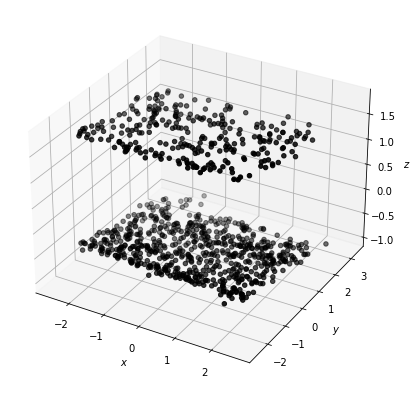

In [4]:
#Visualize
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

x = list(projected_df['x'])
y = list(projected_df['y'])
z = list(projected_df['z'])

ax.scatter3D(x,y,z,color = "black")

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.show()

2
7


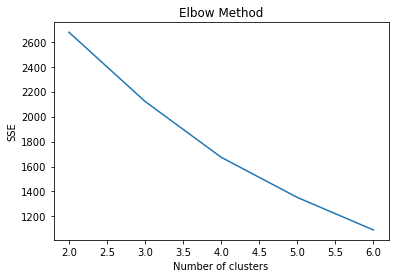

In [5]:
from sklearn.cluster import KMeans

minClusters = input()
minClusters = int(minClusters)

maxClusters = input()
maxClusters = int(maxClusters)

SSE = []
for K in range(minClusters, maxClusters):
    km = KMeans(K)
    km.fit(projected_df)
    SSE.append(km.inertia_)
    
plt.plot(range(minClusters, maxClusters), SSE)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

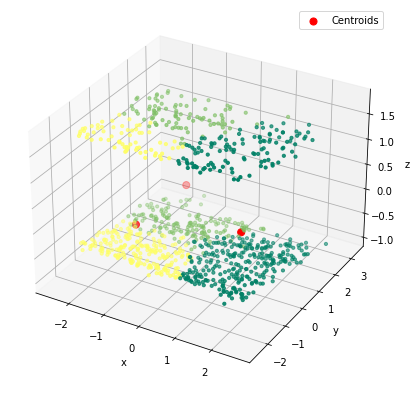

C1 = ( 1.3708718898924264, -0.12357608803101207, 0.026855279030727125 )
C2 = ( -0.8631378108053657, 1.2177983406786674, 0.08683785161692982 )
C3 = ( -1.2005628297714945, -0.8917688327755965, -0.11452477708680138 )


In [6]:

#Define K
K = 3
#Apply K-means
km = KMeans(K)
clusters = km.fit_predict(projected_df)

fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111, projection='3d')

#Plot centroids 
scatter = ax.scatter(km.cluster_centers_[:, 0],
                     km.cluster_centers_[:, 1],
                     km.cluster_centers_[:, 2],
                     s = 50,
                     marker='o',
                     c='red',
                     label='Centroids')
#Plot data
scatter = ax.scatter(projected_df['x'],
                     projected_df['y'],
                     projected_df['z'],
                     c=clusters,
                     s=10, 
                     cmap='summer')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
plt.show()

#Print centroids
centroid = np.array(km.cluster_centers_)
for i in range(K):
    print('C' +str(i+1) +' = ( ' + str(centroid[i][0]) + ', ' 
                                 + str(centroid[i][1]) + ', ' 
                                 + str(centroid[i][2]) + ' )' )

In [1]:
type(X)

NameError: name 'X' is not defined